In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.datasets import mnist
from keras.models import Sequential  

from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils                         

## Loading Training Data

The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [ ]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Using matplotlib, we can plot some sample images from the training set directly into this Colab Notebook.

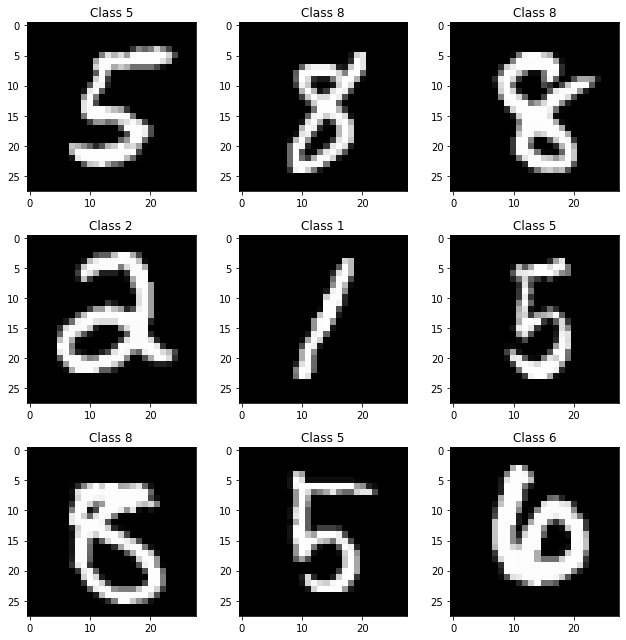

In [ ]:
plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

Let's examine a single digit a little closer, and print out the array representing the last digit.

In [ ]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
      
matprint(X_train[num])

0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0  176  253  119    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0  126  253  252  246  122    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0  0    0   23  227  253  252  252  192    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0  0    0   29  252  253  252  120   28    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0  0    0   29  252  253  252   55    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0  0    0  170  253  255  253   56    0    0    0

Each pixel is an 8-bit integer from 0-255. 0 is full black, while 255 is full white. This what we call a single-channel pixel. It's called monochrome.

In [ ]:
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
nb_classes = 10 #one hot encoding

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Building a 3-layer fully connected network (FCN)

In [ ]:
# The Sequential model is a linear stack of layers and is very common.

model = Sequential()

## The first hidden layer

In [ ]:
# The first hidden layer is a set of 512 nodes (artificial neurons).
# Each node will receive an element from each input vector and apply some weight and bias to it.

model.add(Dense(512, input_shape=(784,))) #(784,) is not a typo -- that represents a 784 length vector!

In [ ]:
# An "activation" is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged.

model.add(Activation('relu'))

In [ ]:
# Dropout zeroes a selection of random outputs (i.e., disables their activation)
# Dropout helps protect the model from memorizing or "overfitting" the training data.
model.add(Dropout(0.2))

## Adding the second hidden layer

In [ ]:
# The second hidden layer appears identical to our first layer.
# However, instead of each of the 512-node receiving 784-inputs from the input image data,
# they receive 512 inputs from the output of the first 512-node layer.

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

## The Final Output Layer

In [ ]:
# The final layer of 10 neurons in fully-connected to the previous 512-node layer.
# The final layer of a FCN should be equal to the number of desired classes (10 in this case).
model.add(Dense(10))

In [ ]:
# The "softmax" activation represents a probability distribution over K different possible outcomes.
# Its values are all non-negative and sum to 1.

model.add(Activation('softmax'))

In [ ]:
# Summarize the built model

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

## Compiling the model

In [ ]:
# Let's use the Adam optimizer for learning
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train the model

In [ ]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 0.2487 - accuracy: 0.9250
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1020 - accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0703 - accuracy: 0.9779
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0583 - accuracy: 0.9811
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0457 - accuracy: 0.9849


## Evaluate Model's Accuracy on Test Data

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0625 - accuracy: 0.9822
Test score: 0.06250034272670746
Test accuracy: 0.982200026512146


In [44]:
pre = model.predict(X_test)
pre

array([[1.10800258e-09, 7.55939933e-09, 5.58872784e-07, ...,
        9.99995828e-01, 7.88619570e-09, 1.43467662e-06],
       [2.33516784e-09, 1.03969305e-05, 9.99989510e-01, ...,
        5.58625646e-11, 5.05954745e-09, 2.33056304e-12],
       [4.12339034e-08, 9.99983191e-01, 1.56631972e-06, ...,
        9.59277713e-06, 1.65900053e-06, 5.55845752e-08],
       ...,
       [5.97211571e-13, 2.95556524e-10, 2.80835793e-13, ...,
        1.71947843e-08, 6.58478896e-11, 1.46340415e-06],
       [8.80841441e-11, 1.21095894e-11, 2.81361224e-13, ...,
        5.98350119e-11, 1.43535931e-06, 2.48825960e-11],
       [3.18090609e-10, 9.09226167e-12, 3.76015122e-11, ...,
        1.30178833e-14, 2.21675699e-11, 2.30082685e-12]], dtype=float32)

In [46]:
import pandas as pd
p = pd.DataFrame(pre[:5])
p

,0,1,2,3,4,5,6,7,8,9
0,1.108003e-09,7.559399e-09,5.588728e-07,2.095588e-06,1.578248e-11,1.234589e-09,2.746000e-14,9.999958e-01,7.886196e-09,1.434677e-06
1,2.335168e-09,1.039693e-05,9.999895e-01,4.051537e-08,3.893900e-13,2.929642e-10,9.249054e-10,5.586256e-11,5.059547e-09,2.330563e-12
2,4.123390e-08,9.999832e-01,1.566320e-06,1.277006e-08,2.796357e-06,2.570448e-07,8.811153e-07,9.592777e-06,1.659001e-06,5.558458e-08
3,9.999968e-01,2.938825e-10,1.570549e-07,4.621731e-09,7.619956e-10,1.366754e-09,1.120463e-06,1.068512e-08,1.408462e-09,1.857199e-06
4,4.930187e-08,2.162497e-07,4.522902e-07,3.538901e-09,9.987288e-01,8.689796e-08,1.043183e-08,1.187918e-05,8.677585e-09,1.258578e-03


In [48]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

p.T.style.apply(highlight_max)

,0,1,2,3,4
0,0.000000,0.000000,0.000000,0.999997,0.000000
1,0.000000,0.000010,0.999983,0.000000,0.000000
2,0.000001,0.999990,0.000002,0.000000,0.000000
3,0.000002,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000003,0.000000,0.998729
5,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000001,0.000001,0.000000
7,0.999996,0.000000,0.000010,0.000000,0.000012
8,0.000000,0.000000,0.000002,0.000000,0.000000
9,0.000001,0.000000,0.000000,0.000002,0.001259
